## *Loading data into MongoDB*

In [2]:
import pymongo
import pandas as pd

In [3]:
df = pd.read_csv('Tetuan City power consumption.csv')

In [4]:
data = df.to_dict(orient="records")

In [3]:
client_con = pymongo.MongoClient("mongodb://127.0.0.0:27017/")

In [5]:
# Creating a Mongo DB "i535_final_project" using the MongoClient
db = client_con["i535_final_project"]

In [6]:
# Creating a collections (table) in the db
table = db["power_consumption"]

In [7]:
# Data to be inserted into the mongo db
data

[{'DateTime': '1/1/2017 0:00',
  'Temperature': 6.559,
  'Humidity': 73.8,
  'Wind Speed': 0.083,
  'general diffuse flows': 0.051,
  'diffuse flows': 0.119,
  'Zone 1 Power Consumption': 34055.6962,
  'Zone 2  Power Consumption': 16128.87538,
  'Zone 3  Power Consumption': 20240.96386},
 {'DateTime': '1/1/2017 0:10',
  'Temperature': 6.414,
  'Humidity': 74.5,
  'Wind Speed': 0.083,
  'general diffuse flows': 0.07,
  'diffuse flows': 0.085,
  'Zone 1 Power Consumption': 29814.68354,
  'Zone 2  Power Consumption': 19375.07599,
  'Zone 3  Power Consumption': 20131.08434},
 {'DateTime': '1/1/2017 0:20',
  'Temperature': 6.313,
  'Humidity': 74.5,
  'Wind Speed': 0.08,
  'general diffuse flows': 0.062,
  'diffuse flows': 0.1,
  'Zone 1 Power Consumption': 29128.10127,
  'Zone 2  Power Consumption': 19006.68693,
  'Zone 3  Power Consumption': 19668.43373},
 {'DateTime': '1/1/2017 0:30',
  'Temperature': 6.121,
  'Humidity': 75.0,
  'Wind Speed': 0.083,
  'general diffuse flows': 0.091,
  '

In [8]:
# Insert all the data into the database
table.insert_many(data)

In [9]:
table.find_one()

{'_id': ObjectId('637977957c9505df93f08d94'),
 'DateTime': '1/1/2017 0:00',
 'Temperature': 6.559,
 'Humidity': 73.8,
 'Wind Speed': 0.083,
 'general diffuse flows': 0.051,
 'diffuse flows': 0.119,
 'Zone 1 Power Consumption': 34055.6962,
 'Zone 2  Power Consumption': 16128.87538,
 'Zone 3  Power Consumption': 20240.96386}

In [14]:
cnt = 0
for i in table.find():
    while cnt < 5:
        print(f'Row Number: {cnt}')
        print(i)
        print()
        cnt += 1
    break

Row Number: 0
{'_id': ObjectId('637977957c9505df93f08d94'), 'DateTime': '1/1/2017 0:00', 'Temperature': 6.559, 'Humidity': 73.8, 'Wind Speed': 0.083, 'general diffuse flows': 0.051, 'diffuse flows': 0.119, 'Zone 1 Power Consumption': 34055.6962, 'Zone 2  Power Consumption': 16128.87538, 'Zone 3  Power Consumption': 20240.96386}

Row Number: 1
{'_id': ObjectId('637977957c9505df93f08d94'), 'DateTime': '1/1/2017 0:00', 'Temperature': 6.559, 'Humidity': 73.8, 'Wind Speed': 0.083, 'general diffuse flows': 0.051, 'diffuse flows': 0.119, 'Zone 1 Power Consumption': 34055.6962, 'Zone 2  Power Consumption': 16128.87538, 'Zone 3  Power Consumption': 20240.96386}

Row Number: 2
{'_id': ObjectId('637977957c9505df93f08d94'), 'DateTime': '1/1/2017 0:00', 'Temperature': 6.559, 'Humidity': 73.8, 'Wind Speed': 0.083, 'general diffuse flows': 0.051, 'diffuse flows': 0.119, 'Zone 1 Power Consumption': 34055.6962, 'Zone 2  Power Consumption': 16128.87538, 'Zone 3  Power Consumption': 20240.96386}

Row Num

In [7]:
import pandas as pd
import numpy as np
import pyspark
import json
import csv
import sys,getopt
# from pymongo import MongoClient
# import pymongo
# import plotly.express as pl
import seaborn as sns
from pyspark.sql.functions import isnan, when, count, col

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Data Cleaning and pre-processing

In [8]:
data = pd.read_csv("Tetuan City power consumption.csv")

In [9]:
data_format = data.copy()

In [10]:
data_format

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [11]:
for i in data_format.Humidity:
    if i < 40:
        data_format.loc[data_format['Humidity']==i, "Humidity_range"]= "less_humidity"
    elif 40 < i <60:
        data_format.loc[data_format['Humidity']==i, "Humidity_range"]= "medium_humidity"
    else:
        data_format.loc[data_format['Humidity']==i, "Humidity_range"]= "high_humidity"

In [12]:
data_format.Humidity_range.value_counts()

high_humidity      37717
medium_humidity    11939
less_humidity       2760
Name: Humidity_range, dtype: int64

In [13]:
data_format['Temperature'].describe()

count    52416.000000
mean        18.810024
std          5.815476
min          3.247000
25%         14.410000
50%         18.780000
75%         22.890000
max         40.010000
Name: Temperature, dtype: float64

In [14]:
for i in data_format.Temperature:
    if i < 10:
        data_format.loc[data_format['Temperature']==i, "Temparature_range"]= "low_temperature"
    elif 10 < i <20:
        data_format.loc[data_format['Temperature']==i, "Temparature_range"]= "medium_temperature"
    else:
        data_format.loc[data_format['Temperature']==i, "Temparature_range"]= "high_temperature"

In [15]:
data_format.Temparature_range.value_counts()

medium_temperature    26977
high_temperature      22565
low_temperature        2874
Name: Temparature_range, dtype: int64

In [16]:
data_format

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Humidity_range,Temparature_range
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,high_humidity,low_temperature
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,high_humidity,low_temperature
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,high_humidity,low_temperature
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,high_humidity,low_temperature
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,high_humidity,low_temperature
...,...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,high_humidity,low_temperature
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,high_humidity,low_temperature
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,high_humidity,low_temperature
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,high_humidity,low_temperature


In [17]:
data_format.to_csv("Power_consumption.csv", index = False)

## Spark Context Initialization

In [18]:
from pyspark import SparkContext
sc = SparkContext()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/11/20 20:43:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [19]:
mongo_rdd = sc.textFile('Power_consumption.csv')

In [20]:
mongo_rdd.first()

'DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2  Power Consumption,Zone 3  Power Consumption,Humidity_range,Temparature_range'

In [21]:
mongo_rdd.top(50)

['DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2  Power Consumption,Zone 3  Power Consumption,Humidity_range,Temparature_range',
 '9/9/2017 9:50,23.88,76.0,0.313,497.0,66.65,32724.95575,19788.77339,14920.69459,high_humidity,high_temperature',
 '9/9/2017 9:40,23.6,78.4,0.277,484.2,74.7,32419.11504,19511.85031,14779.48927,high_humidity,high_temperature',
 '9/9/2017 9:30,23.29,80.6,0.283,329.2,75.6,31750.0885,19279.83368,14297.03779,high_humidity,high_temperature',
 '9/9/2017 9:20,22.87,81.2,0.276,332.9,90.9,31291.32743,18778.37838,13955.79162,high_humidity,high_temperature',
 '9/9/2017 9:10,22.79,82.6,0.292,251.1,103.4,30628.67257,18636.17464,13861.65475,high_humidity,high_temperature',
 '9/9/2017 9:00,22.58,83.1,0.286,278.4,110.4,29978.76106,18318.08732,13614.54545,high_humidity,high_temperature',
 '9/9/2017 8:50,22.37,84.0,0.257,232.9,94.5,29526.37168,17951.35135,13290.94995,high_humidity,high_temperature',
 '9/9/2017 8:40,2

In [22]:
mongo_rdd.take(10)

['DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2  Power Consumption,Zone 3  Power Consumption,Humidity_range,Temparature_range',
 '1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.6962,16128.87538,20240.96386,high_humidity,low_temperature',
 '1/1/2017 0:10,6.414,74.5,0.083,0.07,0.085,29814.68354,19375.07599,20131.08434,high_humidity,low_temperature',
 '1/1/2017 0:20,6.313,74.5,0.08,0.062,0.1,29128.10127,19006.68693,19668.43373,high_humidity,low_temperature',
 '1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,high_humidity,low_temperature',
 '1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.6962,17872.34043,18442.40964,high_humidity,low_temperature',
 '1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,high_humidity,low_temperature',
 '1/1/2017 1:00,5.641,77.7,0.08,0.048,0.096,25998.98734,16993.31307,17945.06024,high_humidity,low_temperature',
 '1/1/2017 1:10,5.496,78.

In [23]:
## Mapreduce jobs



mongo_data_rdd_word_counts = mongo_rdd.flatMap(lambda line: line.split()).map(lambda m: (m[1:], 1)).reduceByKey(lambda x, y: x+y)

In [24]:
# mapreduce operations
mongo_data_rdd_word_counts.collect()

[('ateTime,Temperature,Humidity,Wind', 1),
 ('lows,diffuse', 1),
 ('', 3),
 ('onsumption,Zone', 2),
 ('/1/2017', 1296),
 (':00,6.559,73.8,0.083,0.051,0.119,34055.6962,16128.87538,20240.96386,high_humidity,low_temperature',
  1),
 (':10,6.414,74.5,0.083,0.07,0.085,29814.68354,19375.07599,20131.08434,high_humidity,low_temperature',
  1),
 (':20,6.313,74.5,0.08,0.062,0.1,29128.10127,19006.68693,19668.43373,high_humidity,low_temperature',
  1),
 (':40,5.921,75.7,0.081,0.048,0.085,27335.6962,17872.34043,18442.40964,high_humidity,low_temperature',
  1),
 (':50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,high_humidity,low_temperature',
  1),
 (':10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711,high_humidity,low_temperature',
  1),
 (':20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217,high_humidity,low_temperature',
  1),
 (':30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687,high_humidity,low_temperature',
  1),
 (':40

In [25]:
# A few map reduce operations
row = mongo_rdd.flatMap(lambda y:y.split(' '))

In [26]:
row.collect()

['DateTime,Temperature,Humidity,Wind',
 'Speed,general',
 'diffuse',
 'flows,diffuse',
 'flows,Zone',
 '1',
 'Power',
 'Consumption,Zone',
 '2',
 '',
 'Power',
 'Consumption,Zone',
 '3',
 '',
 'Power',
 'Consumption,Humidity_range,Temparature_range',
 '1/1/2017',
 '0:00,6.559,73.8,0.083,0.051,0.119,34055.6962,16128.87538,20240.96386,high_humidity,low_temperature',
 '1/1/2017',
 '0:10,6.414,74.5,0.083,0.07,0.085,29814.68354,19375.07599,20131.08434,high_humidity,low_temperature',
 '1/1/2017',
 '0:20,6.313,74.5,0.08,0.062,0.1,29128.10127,19006.68693,19668.43373,high_humidity,low_temperature',
 '1/1/2017',
 '0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,high_humidity,low_temperature',
 '1/1/2017',
 '0:40,5.921,75.7,0.081,0.048,0.085,27335.6962,17872.34043,18442.40964,high_humidity,low_temperature',
 '1/1/2017',
 '0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,high_humidity,low_temperature',
 '1/1/2017',
 '1:00,5.641,77.7,0.08,0.048,0.096,25998

## Spark Session Builder

In [27]:
from pyspark.sql import SparkSession
import pyspark.sql as sparksql
spark = SparkSession.builder.appName('consumption').getOrCreate()


In [28]:
logfile = "/config/workspace/Power_consumption.csv"

In [29]:
# Read csv using spark session builder object as a dataframe
main_data = spark.read.csv(logfile, inferSchema=True, header = True)

In [30]:
main_data

DataFrame[DateTime: string, Temperature: double, Humidity: double, Wind Speed: double, general diffuse flows: double, diffuse flows: double, Zone 1 Power Consumption: double, Zone 2  Power Consumption: double, Zone 3  Power Consumption: double, Humidity_range: string, Temparature_range: string]

In [31]:
main_data.groupby('Humidity_range').count().show()

+---------------+-----+
| Humidity_range|count|
+---------------+-----+
|  less_humidity| 2760|
|medium_humidity|11939|
|  high_humidity|37717|
+---------------+-----+



In [32]:
humidity_plot = main_data.groupby('Humidity_range').count().toPandas()

<AxesSubplot: xlabel='Humidity_range', ylabel='count'>

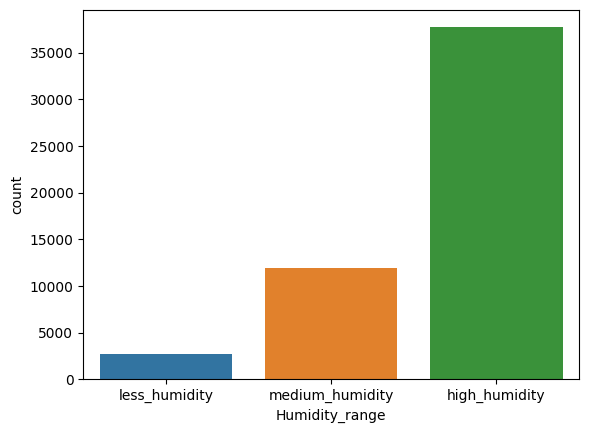

In [33]:
sns.barplot(data = humidity_plot, x = "Humidity_range", y = "count")

In [34]:
temparature_plot = main_data.groupby('Temparature_range').count().toPandas()

In [35]:
temparature_plot

,Temparature_range,count
0,low_temperature,2874
1,high_temperature,22565
2,medium_temperature,26977


<AxesSubplot: xlabel='Temparature_range', ylabel='count'>

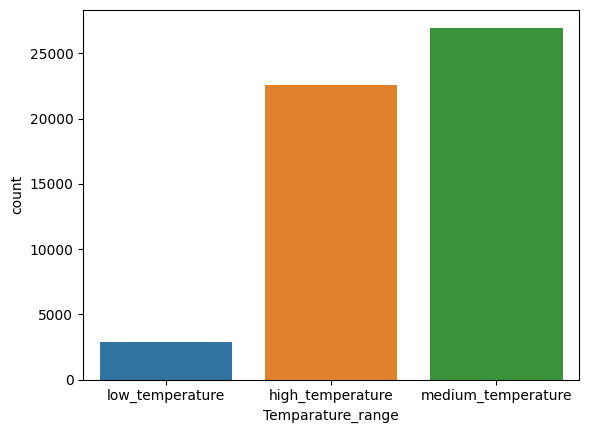

In [36]:
sns.barplot(data = temparature_plot, x = "Temparature_range", y = "count")

## Data cleaning using Spark

In [39]:
## chaning column names
def withColumnRenamed(old:str, new: str) : DataFrame

In [40]:
main_data = main_data.withColumnRenamed("Wind Speed","wind_speed")
main_data = main_data.withColumnRenamed("general diffuse flows","general_diffuse_flows")
main_data = main_data.withColumnRenamed("diffuse flows","diffuse_flows")
main_data = main_data.withColumnRenamed("Zone 1 Power Consumption","Zone_one_Power_Consumption")
main_data = main_data.withColumnRenamed("Zone 2  Power Consumption","Zone_two_Power_Consumption")
main_data = main_data.withColumnRenamed("Zone 3  Power Consumption","Zone_three_Power_Consumption")

In [41]:
main_data.createOrReplaceTempView('table')

In [42]:
main_data

DataFrame[DateTime: string, Temperature: double, Humidity: double, wind_speed: double, general_diffuse_flows: double, diffuse_flows: double, Zone_one_Power_Consumption: double, Zone_two_Power_Consumption: double, Zone_three_Power_Consumption: double, Humidity_range: string, Temparature_range: string]

In [43]:
spark.sql("SELECT DateTime,wind_speed, general_diffuse_flows FROM table WHERE Humidity_range == 'less_humidity'").show()

+---------------+----------+---------------------+
|       DateTime|wind_speed|general_diffuse_flows|
+---------------+----------+---------------------+
|1/16/2017 15:20|     0.083|                413.8|
|1/16/2017 15:30|     0.082|                395.3|
|1/16/2017 15:40|     0.085|                332.8|
|1/16/2017 15:50|     0.083|                349.9|
|1/16/2017 16:00|     0.084|                253.6|
|1/24/2017 12:10|     0.086|                520.2|
|1/24/2017 12:20|     0.089|                532.1|
|1/24/2017 12:30|     0.087|                540.7|
|1/24/2017 12:40|     0.089|                546.5|
|1/24/2017 12:50|     0.089|                553.5|
|1/24/2017 13:00|     0.091|                559.0|
|1/24/2017 13:10|     0.089|                559.4|
|1/24/2017 13:20|     0.092|                560.4|
|1/24/2017 13:30|      0.09|                560.7|
|1/24/2017 13:40|     0.086|                558.4|
|1/24/2017 13:50|     0.091|                555.6|
|1/24/2017 14:00|     0.088|   

In [44]:
main_data.printSchema()

root
 |-- DateTime: string (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- general_diffuse_flows: double (nullable = true)
 |-- diffuse_flows: double (nullable = true)
 |-- Zone_one_Power_Consumption: double (nullable = true)
 |-- Zone_two_Power_Consumption: double (nullable = true)
 |-- Zone_three_Power_Consumption: double (nullable = true)
 |-- Humidity_range: string (nullable = true)
 |-- Temparature_range: string (nullable = true)



In [45]:
## checking null values
main_data = main_data.fillna(0)

## Pipeline

In [48]:
from pyspark.ml.feature import (VectorAssembler, OneHotEncoder, StringIndexer)

In [73]:
consumption_string_index = StringIndexer(inputCol = 'Humidity_range', outputCol = 'Humidity_nameindex')
consumption_encoder = OneHotEncoder(inputCol = 'Humidity_nameindex', outputCol = 'consumption_vec')

In [74]:
temp_string_index = StringIndexer(inputCol = 'Temparature_range', outputCol = 'Temparature_nameindex')
temp_encoder = OneHotEncoder(inputCol = 'Temparature_nameindex', outputCol = 'temp_vec')

In [75]:
vector_assembler = VectorAssembler(inputCols = ['Temperature', 'Humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows', 'Zone_two_Power_Consumption','Zone_three_Power_Consumption','consumption_vec', 'temp_vec'], outputCol = 'features')

In [ ]:
train_df = train_df.drop("DateTime")

In [76]:
data_split = main_data.randomSplit([0.7, 0.3])
train_df = data_split[0]
test_df = data_split[1]

In [83]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Zone_one_Power_Consumption', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [77]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[consumption_string_index,consumption_encoder, temp_string_index, temp_encoder,vector_assembler,lr])

In [79]:
##Increasing storage 
from pyspark import StorageLevel
main_data.persist(StorageLevel.MEMORY_AND_DISK)

DataFrame[DateTime: string, Temperature: double, Humidity: double, wind_speed: double, general_diffuse_flows: double, diffuse_flows: double, Zone_one_Power_Consumption: double, Zone_two_Power_Consumption: double, Zone_three_Power_Consumption: double, Humidity_range: string, Temparature_range: string]

In [80]:
## persist on train data
train_df.persist(StorageLevel.MEMORY_AND_DISK_2)

DataFrame[DateTime: string, Temperature: double, Humidity: double, wind_speed: double, general_diffuse_flows: double, diffuse_flows: double, Zone_one_Power_Consumption: double, Zone_two_Power_Consumption: double, Zone_three_Power_Consumption: double, Humidity_range: string, Temparature_range: string]

In [81]:
## Fitting into the pipeline
model = pipeline.fit(train_df)

22/11/20 21:41:24 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/11/20 21:41:24 WARN BlockManager: Block rdd_111_1 replicated to only 0 peer(s) instead of 1 peers
22/11/20 21:41:25 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/11/20 21:41:25 WARN BlockManager: Block rdd_111_0 replicated to only 0 peer(s) instead of 1 peers


In [85]:
lr_preds = model.transform(test_df)

In [91]:
lr_preds.select("prediction","Zone_one_Power_Consumption","features").show()

+------------------+--------------------------+--------------------+
|        prediction|Zone_one_Power_Consumption|            features|
+------------------+--------------------------+--------------------+
| 29867.38501774147|               28228.86076|[6.121,75.0,0.083...|
|29267.857992253554|                27335.6962|[5.921,75.7,0.081...|
|25527.566468874382|               25275.94937|[5.124,73.7,0.076...|
|25743.027123896234|                   25920.0|[5.836,71.3,2.66,...|
|27353.837927290442|               28714.93671|[7.54,64.21,4.916...|
|28524.423428672246|               29261.77215|[9.49,59.3,2.451,...|
| 30861.39611967553|               30258.22785|[15.57,58.06,0.07...|
|30784.356380480596|               30404.05063|[15.65,58.7,0.077...|
|30375.312984203414|               30021.26582|[15.79,56.66,0.07...|
| 30057.61258644868|                29747.8481|[15.74,55.56,0.07...|
| 29987.24830998185|               29571.64557|[15.64,57.26,0.07...|
| 29531.60925038769|              

In [186]:
pl = lr_preds.select("prediction","Zone_one_Power_Consumption","features").toPandas()

In [94]:
from pyspark.ml.evaluation import RegressionEvaluator
linear_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Zone_one_Power_Consumption",metricName="r2")

In [96]:
print("R_squared on test data = ",linear_evaluator.evaluate(lr_preds))

R_squared on test data =  0.8210994201793973


## AI Fairness

In [99]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 33.8 MB 73.5 MB/s eta 0:00:01
     |████████████████████████████████| 31.2 MB 73.8 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 75.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [104]:
from sklearn.model_selection import train_test_split

In [108]:
data_format.drop(["DateTime","Humidity_range","Temparature_range"], axis = 1, inplace = True)

In [110]:
data_format.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [112]:
X = data_format.drop("Zone 1 Power Consumption", axis = 1)
Y = data_format["Zone 1 Power Consumption"]

In [155]:
from sklearn.linear_model import LinearRegression, Lasso
linear = LinearRegression()
lasso = Lasso(alpha=0.07)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.33, random_state=1)

In [134]:
X_train = X_train.values

In [135]:
X_test = X_test.values

In [141]:
y_train = y_train.values
y_test = y_test.values

In [100]:
from mlxtend.evaluate import bias_variance_decomp

In [145]:
 mse, bias, var = bias_variance_decomp(linear, X_train, y_train, X_test, y_test,loss='mse', num_rounds=200, random_seed=123)

In [159]:
print('Average bias:',bias)

Average bias: 9282674.22084863


In [156]:
l_mse, l_bias, l_var = bias_variance_decomp(lasso, X_train, y_train, X_test, y_test,loss='mse', num_rounds=500, random_seed=43)

In [158]:
print('Average bias:',l_bias)

Average bias: 9282667.116623234
